In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings
warnings.simplefilter('ignore')

# The dataset contains transactions made by credit cards in September 2013 by European cardholders.
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and 
# copy the path for the csv file
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Grab a peek at the data
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())
data.columns


(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

In [5]:
# Determine number of fraud cases in dataset
fraud = data[data['class'] == 1]
valid = data[data['class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


#Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. 
#Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset.
#But first, let’s implement the model without it and will balance the data only if needed.

In [6]:
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
valid.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

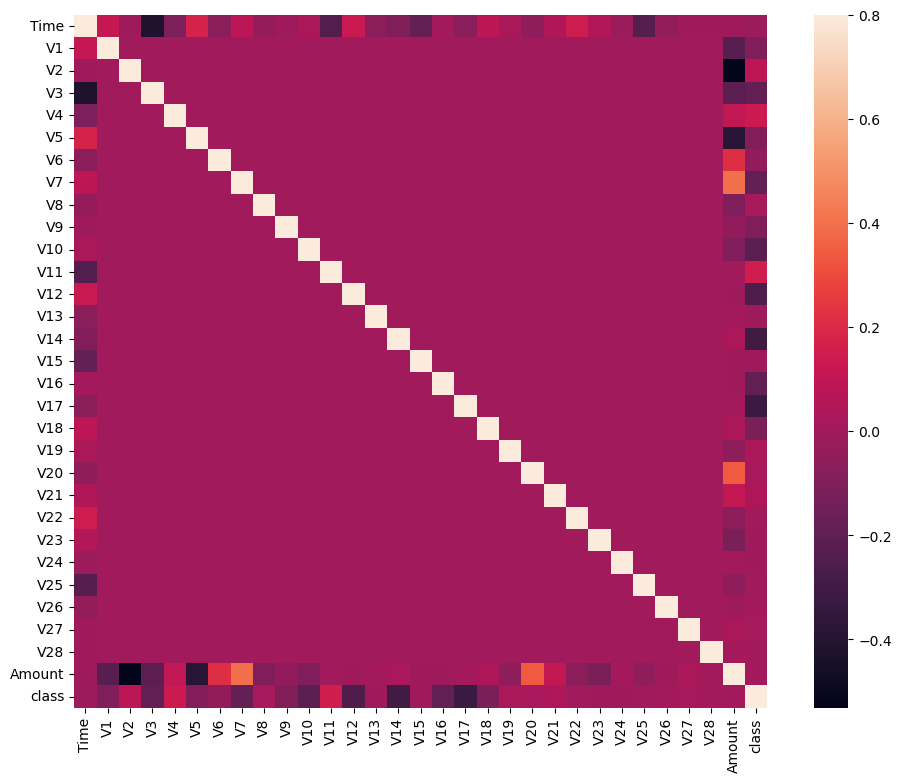

In [8]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


# In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

In [9]:
# dividing the X and the Y from the dataset
x = data.drop(['class'], axis = 1)
y = data["class"]
data["class"].unique()

array([0, 1], dtype=int64)

train_acc = []
cv = []
test_acc = []

for i in range(0,10):
    
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=i)
    
    from sklearn.linear_model import LogisticRegression
    model=LogisticRegression()
    model.fit(x_train,y_train)

    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model,x_train,y_train,cv=5).mean())
    
    from sklearn.metrics import accuracy_score
    train_acc.append(accuracy_score(y_train,ypred_train))
    test_acc.append(accuracy_score(y_test,ypred_test))
    
em =pd.DataFrame({"train_acc":train_acc,"cv":cv,"test_acc":test_acc})

# for best random state number...just check train == cv or not

gm = em[(abs(em["test_acc"]-em["cv"])<=0.05)]
# it retains rows where the difference between training R-squared and CV R-squared is within 0.05.
# Difference b/w train and cv must be less than 0.05 itself

rs=gm[gm["test_acc"]==gm["test_acc"].max()].index.tolist()[0]  

pd.set_option("display.max_rows",None)
rs
# rs = 4 is best


In [10]:
# There is no gridsearchcv for finding random state number....do for loop
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV,cross_val_score,GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix

In [12]:
# without PCA, with 30 columns

from sklearn.linear_model import LogisticRegression  # support vector classifier
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

# predictions..

ypred_train = log_model.predict(x_train)
ypred_test = log_model.predict(x_test)

# evaluation 

from sklearn.metrics import accuracy_score
print("Train Accuracy",accuracy_score(y_train,ypred_train))
print("Test Accuracy",accuracy_score(y_test,ypred_test))

# cross validation score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model,x_train,y_train,cv=5,scoring="accuracy")
print("cross validation score ",scores.mean())

# Calculate MCC

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_train, ypred_train)
print("Matthews Correlation Coefficient (MCC):", mcc)


Train Accuracy 0.9988852070486515
Test Accuracy 0.9991222218320986
cross validation score  0.9989466523294345
Matthews Correlation Coefficient (MCC): 0.6531638738344775


In [13]:
# Principle component analysis...

from sklearn.decomposition import PCA
pca_model = PCA(n_components = 0.95) 

x_train_pca = pca_model.fit_transform(x_train)
x_test_pca = pca_model.transform(x_test)

pca_model.explained_variance_ratio_

array([0.99997407])

In [14]:
# with PCA, with single column...

from sklearn.linear_model import LogisticRegression  # support vector classifier
log_model = LogisticRegression()
log_model.fit(x_train_pca,y_train)

# predictions..

ypred_train = log_model.predict(x_train_pca)
ypred_test = log_model.predict(x_test_pca)

# evaluation 

from sklearn.metrics import accuracy_score
print("Train Accuracy",accuracy_score(y_train,ypred_train))
print("Test Accuracy",accuracy_score(y_test,ypred_test))

# cross validation score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model,x_train_pca,y_train,cv=5,scoring="accuracy")
print("cross validation score ",scores.mean())

# Calculate MCC

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_train, ypred_train)
print("Matthews Correlation Coefficient (MCC):", mcc)


Train Accuracy 0.9982839210867037
Test Accuracy 0.9982268881008391
cross validation score  0.9982839210867036
Matthews Correlation Coefficient (MCC): 0.0


Matthews correlation coefficient (MCC) provides a more balanced
measure of classification performance than accuracy, 
especially when dealing with imbalanced datasets, 
by considering both the over- and under-predictions of the model.    
It's a valuable metric for evaluating binary classifiers in machine learning

In [15]:
from sklearn.metrics import matthews_corrcoef
# Calculate MCC
mcc = matthews_corrcoef(y_train, ypred_train)

print("Matthews Correlation Coefficient (MCC):", mcc)


Matthews Correlation Coefficient (MCC): 0.0



The Matthews Correlation Coefficient (MCC) is a metric used to evaluate the quality of binary classifications. It's especially useful when the classes are imbalanced. MCC returns a value between -1 and +1. A coefficient of +1 indicates a perfect prediction, 0 indicates a prediction no better than random, and -1 indicates total disagreement between prediction and observation.

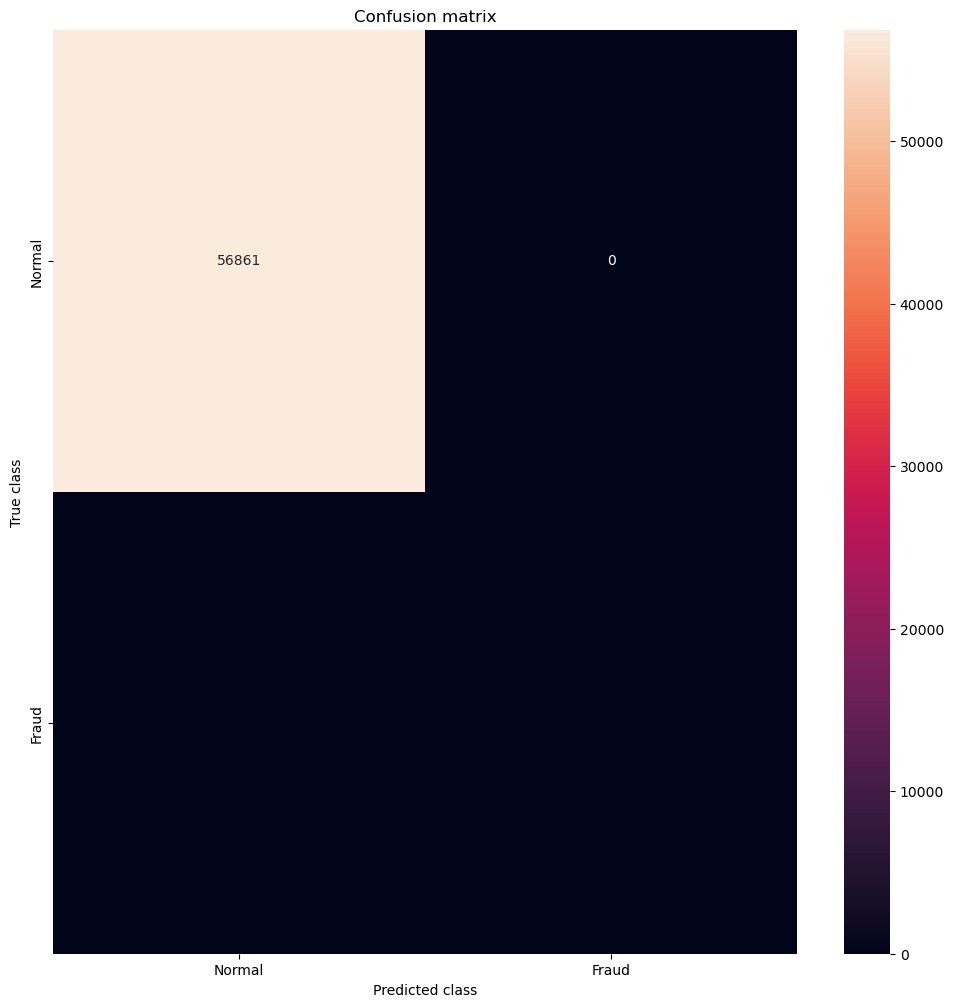

In [16]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, ypred_test)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
#(d stands for "decimal")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


- The confusion matrix helps you understand where your classification model is making mistakes by showing the counts of true and false predictions. It’s a foundational tool for assessing model performance and improving accuracy
  
Accuracy: Measures overall correctness. It’s the proportion of correct predictions (TP + TN) out of all predictions.

Precision: Measures how many of the predicted positives are actually positive. It’s TP / (TP + FP).

Recall (Sensitivity): Measures how many of the actual positives were correctly predicted. It’s TP / (TP + FN).

F1 Score: Combines precision and recall into a single metric, useful when you need to balance both.

# **it is advisable to use the same random_state value throughout your data splitting (train_test_split) and modeling (RandomForestClassifier) processes.**

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
params = {"n_neighbors": list(range(1,11))}
from sklearn.model_selection import GridSearchCV
grid =GridSearchCV(estimator,params,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid.best_params_
# {'n_neighbors': 2}

In [ ]:
# without PCA

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

ypred_train = knn.predict(x_train)
ypred_test = knn.predict(x_test)

from sklearn.metrics import accuracy_score
print("train_accuracy",accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("cv_score ",cross_val_score(knn,x_train,y_train,scoring="accuracy",cv=5).mean())

print("test_accuracy",accuracy_score(y_test,ypred_test))

# Calculate MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_train, ypred_train)
print("Matthews Correlation Coefficient (MCC):", mcc)



In [ ]:
# with PCA

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_pca,y_train)

ypred_train = knn.predict(x_train_pca)
ypred_test = knn.predict(x_test_pca)

from sklearn.metrics import accuracy_score
print("train_accuracy",accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("cv_score ",cross_val_score(knn,x_train_pca,y_train,scoring="accuracy",cv=5).mean())

print("test_accuracy",accuracy_score(y_test,ypred_test))

# Calculate MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_train, ypred_train)
print("Matthews Correlation Coefficient (MCC):", mcc)



# SVM ~ SVC

In [ ]:
estimator = SVC()
param_grid = {"C":[0.1,0.01,1,10],"kernel":["linear","rbf","sigmoid","poly"]}
grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
grid.fit(x_train,y_train)
grid.best_params_  # grid.best_estimator_

In [ ]:
# without PCA

svm_model = SVC(C=0.1,kernel="linear")
svm_model.fit(x_train,y_train)

ypred_train = svm_model.predict(x_train)
ypred_test = svm_model.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("train_accuracy ",accuracy_score(y_train,ypred_train))
print("test_accuracy ",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("cv_score ",cross_val_score(svm_model,x_train,y_train,cv=5).mean())

# Calculate MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_train, ypred_train)
print("Matthews Correlation Coefficient (MCC):", mcc)


In [ ]:
# with PCA

svm_model = SVC(C=0.1,kernel="linear")
svm_model.fit(x_train_pca,y_train)

ypred_train = svm_model.predict(x_train_pca)
ypred_test = svm_model.predict(x_test_pca)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("train_accuracy ",accuracy_score(y_train,ypred_train))
print("test_accuracy ",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("cv_score ",cross_val_score(svm_model,x_train_pca,y_train,cv=5).mean())

# Calculate MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_train, ypred_train)
print("Matthews Correlation Coefficient (MCC):", mcc)


# DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=True)
model.fit(x_train,y_train)

from sklearn.tree import plot_tree
plot_tree(model)
plt.show()

In [ ]:
estimator = DecisionTreeClassifier(random_state=True)
param_grid = {"criterion":["gini","entropy"],"max_depth":list(range(1,16))}

dt_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(x_train,y_train)
dt_grid.best_params_ # or best_estimator_

In [ ]:
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd

# Initialize models with random_state if applicable
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
    # Uncomment if using LGBMClassifier or CatBoostClassifier
    # "LightGBM": LGBMClassifier(random_state=42),
    # "CatBoost": CatBoostClassifier(random_state=42)
}

# Metrics dictionaries
train_acc = {}
test_acc = {}
cv_score_train = {}
precision_train = {}
recall_train = {}
f1_train = {}
train_acc_pca = {}
test_acc_pca = {}
cv_score_train_pca = {}
precision_train_pca = {}
recall_train_pca = {}
f1_train_pca = {}
best_params = {}
best_random_state = {}

# Iterate over each model
for name, model in models.items():
    train_acc_temp = []
    test_acc_temp = []
    cv_temp = []
    train_acc_temp_pca = []
    test_acc_temp_pca = []
    cv_temp_pca = []

    # For finding the best random state, it’s generally better to use scaled data.
    for i in range(0, 100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=i)
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        model.fit(x_train_scaled, y_train)
        ypred_train = model.predict(x_train_scaled)
        ypred_test = model.predict(x_test_scaled)

        cv_temp.append(cross_val_score(model, x_train_scaled, y_train, cv=5).mean())
        train_acc_temp.append(accuracy_score(y_train, ypred_train))
        test_acc_temp.append(accuracy_score(y_test, ypred_test))

    em = pd.DataFrame({"train_acc": train_acc_temp, "cv": cv_temp, "test_acc": test_acc_temp})
    gm = em[(abs(em["test_acc"] - em["cv"]) <= 0.05)]
    rs = gm[gm["test_acc"] == gm["test_acc"].max()].index.tolist()[0]
    best_random_state[name] = rs

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=rs)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Best params (for GridSearchCV applied models)
    if isinstance(model, (KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier,
                          GradientBoostingClassifier, AdaBoostClassifier)):
        param_grid = {}
        if isinstance(model, KNeighborsClassifier):
            param_grid = {"n_neighbors": list(range(1, 50))} 
        elif isinstance(model, SVC):
            param_grid = {"C": [0.1, 0.01, 1, 10, 100], "kernel": ["linear", "rbf", "sigmoid", "poly"]}
        elif isinstance(model, DecisionTreeClassifier):
            param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(1, 16))}
        elif isinstance(model, RandomForestClassifier):
            param_grid = {"n_estimators": list(range(1, 20))}
        elif isinstance(model, GradientBoostingClassifier):
            param_grid = {"n_estimators": list(range(50, 201, 50)), "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
        elif isinstance(model, AdaBoostClassifier):
            param_grid = {"n_estimators": list(range(1, 21))}
        # Uncomment if using LGBMClassifier or CatBoostClassifier
        #elif isinstance(model, LGBMClassifier):
        #    param_grid = {"n_estimators": list(range(50, 201, 50)), "num_leaves": list(range(20, 150, 30))}
        #elif isinstance(model, CatBoostClassifier):
        #    param_grid = {"iterations": [100, 200, 300], "depth": [4, 6, 10]}

        grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=5)
        grid.fit(x_train_scaled, y_train)
        best_params[name] = grid.best_params_
        model = grid.best_estimator_

    # Set random_state for models that require it
    if hasattr(model, 'random_state'):
        model.random_state = best_random_state[name]

    model.fit(x_train_scaled, y_train)
    ypred_train = model.predict(x_train_scaled)
    ypred_test = model.predict(x_test_scaled)
    train_acc[name] = accuracy_score(y_train, ypred_train)
    test_acc[name] = accuracy_score(y_test, ypred_test)
    cv_score_train[name] = cross_val_score(model, x_train_scaled, y_train, cv=5).mean()
    precision_train[name] = precision_score(y_train, ypred_train)
    recall_train[name] = recall_score(y_train, ypred_train)
    f1_train[name] = f1_score(y_train, ypred_train)

    pca = PCA(n_components=0.95)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)
    model.fit(x_train_pca, y_train)
    ypred_train_pca = model.predict(x_train_pca)
    ypred_test_pca = model.predict(x_test_pca)
    train_acc_pca[name] = accuracy_score(y_train, ypred_train_pca)
    test_acc_pca[name] = accuracy_score(y_test, ypred_test_pca)
    cv_score_train_pca[name] = cross_val_score(model, x_train_pca, y_train, cv=5).mean()
    precision_train_pca[name] = precision_score(y_train, ypred_train_pca)
    recall_train_pca[name] = recall_score(y_train, ypred_train_pca)
    f1_train_pca[name] = f1_score(y_train, ypred_train_pca)

# Output results
print("*" * 50)
print("ALGORITHMS")
print("*" * 50)
print("")

for name in models.keys():
    print(f"Model: {name}")
    print(f"Best Params: {best_params.get(name, 'N/A')}")
    print(f"Best Random State: {best_random_state[name]} " )
    print(f"Without PCA:")
    print(f"Train_accuracy: {train_acc[name]}")
    print(f"Test_accuracy: {test_acc[name]}")
    print(f"CV_score_train: {cv_score_train[name]}")
    print(f"Precision_train: {precision_train[name]}")
    print(f"Recall_train: {recall_train[name]}")
    print(f"F1_train: {f1_train[name]}")
    print("-" * 25)
    print(f"With PCA:")
    print(f"Train_accuracy: {train_acc_pca[name]}")
    print(f"Test_accuracy: {test_acc_pca[name]}")
    print(f"CV_score_train: {cv_score_train_pca[name]}")
    print(f"Precision_train: {precision_train_pca[name]}")
    print(f"Recall_train: {recall_train_pca[name]}")
    print(f"F1_train: {f1_train_pca[name]}")
    print("_" * 50)


# Finally we concluded:
# Even though it was an imbalanced dataset we got 99% of test accuracy at logistic regression so, i am concluded here...